In [171]:
import numpy as np
import pandas as pd
import seaborn as sns

## **Exercise: Simple Linear Regression**

Dataset: mpg

1. Analize data 
    - feature: horsepower
    - target: mpg
    <br><br>
2. Apply linear regression
3. Interpret f-test and t-test
4. Interpret the result

In [172]:
sns.load_dataset('mpg')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [173]:
import matplotlib.pyplot as plt


In [174]:
df = sns.load_dataset('mpg')

In [175]:
df[['horsepower','mpg']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  392 non-null    float64
 1   mpg         398 non-null    float64
dtypes: float64(2)
memory usage: 6.3 KB


In [176]:
from scipy.stats import shapiro
sh = shapiro(df['horsepower'].dropna())
alpha = 0.05
if sh[1]<=alpha:
    print(f'pvalue = {sh[1]}, Not Normaly distributed')
    df['horsepower'].fillna(df['horsepower'].median(),inplace=True)
else :
    print(f'pvalue = {sh[1]}, Normaly distributed')
    df['horsepower'].fillna(df['horsepower'].mean(),inplace=True)

pvalue = 5.021719107575371e-15, Not Normaly distributed


In [177]:
df[['horsepower','mpg']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  398 non-null    float64
 1   mpg         398 non-null    float64
dtypes: float64(2)
memory usage: 6.3 KB


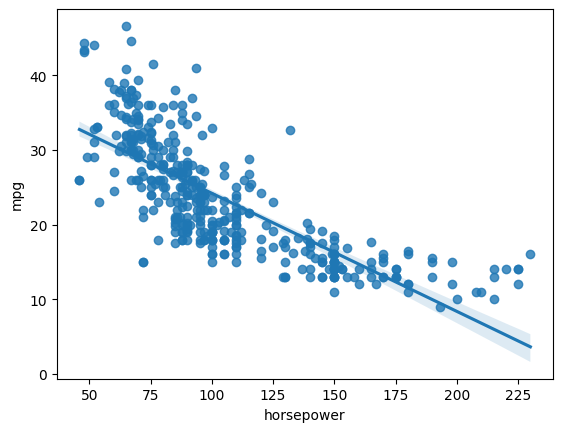

In [178]:
sns.regplot(df,x='horsepower',y='mpg')
plt.show()

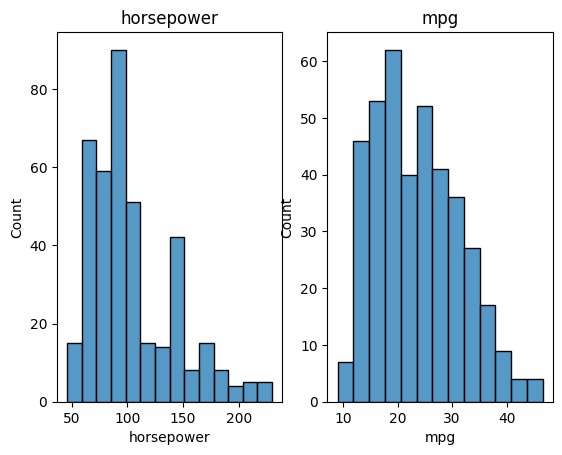

In [179]:
plt.subplot(1,2,1)
sns.histplot(df['horsepower'])
plt.title('horsepower')
plt.subplot(1,2,2)
sns.histplot(df['mpg'])
plt.title('mpg')
plt.show()

In [180]:
df['horsepower'].corr(df['mpg'], method='spearman')

-0.8479748547388403

In [181]:

import statsmodels.api as sm
X = sm.add_constant(df[['horsepower']])
X

,const,horsepower
0,1.0,130.0
1,1.0,165.0
2,1.0,150.0
3,1.0,150.0
4,1.0,140.0
...,...,...
393,1.0,86.0
394,1.0,52.0
395,1.0,84.0
396,1.0,79.0


In [182]:
Y = df['mpg']
Y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [183]:
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     589.6
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           2.00e-80
Time:                        15:18:30   Log-Likelihood:                -1201.1
No. Observations:                 398   AIC:                             2406.
Df Residuals:                     396   BIC:                             2414.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0113      0.723     55.307      0.000      38.589      41.434
horsepower    -0.1582      0.007    -24.282      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       19.910   Durbin-Watson:                   0.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.508
Skew:                           0.537   Prob(JB):                     2.14e-05
Kurtosis:                       3.377   Cond. No.                         323.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
Y2 = model.predict(X)
Y2

0      19.450491
1      13.914884
2      16.287287
3      16.287287
4      17.868889
         ...    
393    26.409540
394    31.786987
395    26.725861
396    27.516662
397    27.042181
Length: 398, dtype: float64

<Axes: xlabel='horsepower', ylabel='mpg'>

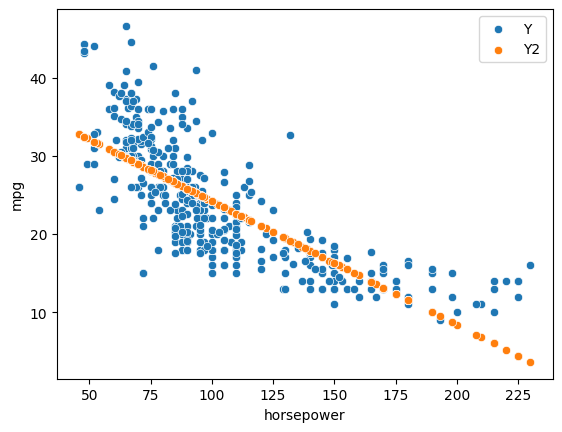

In [185]:
sns.scatterplot(x=df['horsepower'],y=Y, label = 'Y')
sns.scatterplot(x=df['horsepower'],y=Y2, label = 'Y2')

In [195]:
model.f_pvalue
if model.f_pvalue >= 0.05:
    print(f'pvalue = {model.f_pvalue}, Target is independent from Features ')
else:
        print(f'pvalue = {model.f_pvalue}, Target is dependent from Features ')

pvalue = 2.0009235104312362e-80, Target is dependent from Features 


In [196]:
model.pvalues
if model.pvalues[1] >= 0.05:
    print(f'pvalue = {model.pvalues[1]}, Target is independent from Features ')
else:
        print(f'pvalue = {model.pvalues[1]}, Target is dependent from Features ')

pvalue = 2.0009235104310448e-80, Target is dependent from Features 


In [197]:
model.params
if abs(model.params[1]) <= 0.3:
    print(f'Correlation = {model.params[1]}, Target has weak correlation with Features ')
elif 0.3 < abs(model.params[1]) <= 0.7:
    print(f'Correlation = {model.params[1]}, Target has moderate correlation with Features ')
else:
    print(f'Correlation = {model.params[1]}, Target has strong correlation with Features ')

Correlation = -0.15816020313402762, Target has weak correlation with Features 


In [198]:
model.rsquared
print(f'Model ini dapat menjelaskan {round(model.rsquared *100)} % dan sisanya dapat dijelaskan oleh feature lain')


Model ini dapat menjelaskan 60 % dan sisanya dapat dijelaskan oleh feature lain


In [199]:
from statsmodels.tools.eval_measures import mse
mse(Y,Y2)

24.482313198511786

In [200]:
from statsmodels.tools.eval_measures import rmse
rmse(Y,Y2)

4.947960508988707